In [378]:
import pandas as pd
import numpy as np
import os.path
from kmodes.kmodes import KModes
from kmodes import kprototypes
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [379]:
df = pd.read_csv("SURVEY RESULTS_2024.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Which age group do you belong to?                                                                                       50 non-null     object
 1   What is your gender?                                                                                                    50 non-null     object
 2   Which category do you currently belong to?                                                                              50 non-null     object
 3   Which of the following best describes you?                                                                              50 non-null     object
 4   Whic

In [380]:
df = df.iloc[:, list(range(4)) + [8, 10]]
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                                                                                Non-Null Count  Dtype 
---  ------                                                                                --------------  ----- 
 0   Which age group do you belong to?                                                     50 non-null     object
 1   What is your gender?                                                                  50 non-null     object
 2   Which category do you currently belong to?                                            50 non-null     object
 3   Which of the following best describes you?                                            50 non-null     object
 4   How much are you willing to spend on car customisation if surcharges are applicable?  50 non-null     object
 5   How much are you willing to pay for the personalised design?                          50 non-nu

A function that returns Distance Matrix which will be used to calculate silhouette scores to find k clusters

In [381]:
def create_dm(dataset):
    #if the input dataset is a dataframe, we take out the values as a numpy. 
    #If the input dataset is a numpy array, we use it as is.
    if type(dataset).__name__== 'DataFrame':
        dataset=dataset.values    
    lenDataset = len(dataset)
    distance_matrix = np.zeros(lenDataset * lenDataset).reshape(lenDataset, lenDataset)
    for i in range(lenDataset):
        for j in range(lenDataset):
            x1 = dataset[i].reshape(1, -1)
            x2 = dataset[j].reshape(1, -1)
            distance = kprototypes.matching_dissim(x1, x2)
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance
    return distance_matrix

Finding out the optimal number of clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 113.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10, cost: 83.0
Run 1, iteration: 2/100, moves: 0, cost: 83.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9, cost: 83.0
Init: initializing centroids
Init: initializ

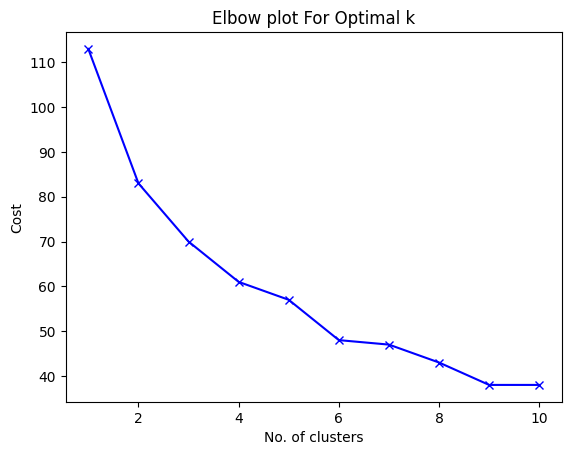

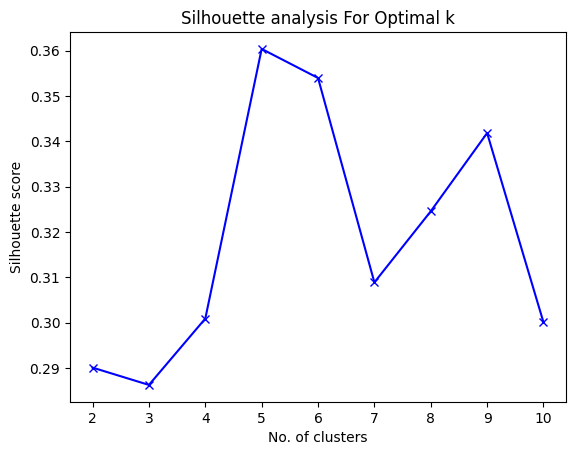

In [382]:
cost = []
K_cost = range(1, 11)
for num_clusters in K_cost:
    kmode = KModes(n_clusters=num_clusters, init="Huang", n_init=5, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

silhouette_scores = []
K_sc = range(2, 11)
distance_matrix = create_dm(df)
for k in K_sc:
    untrained_model = KModes(n_clusters=k, init="Huang", n_init=5, verbose=1)
    trained_model = untrained_model.fit(df)
    cluster_labels = trained_model.labels_
    score = silhouette_score(distance_matrix, cluster_labels, metric="precomputed")
    silhouette_scores.append(score)
    
# find the optimal number of clusters
print(silhouette_scores)
optimal_cluster = silhouette_scores.index(max(silhouette_scores)) + 2
print(optimal_cluster)

plt.plot(K_cost, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow plot For Optimal k')
plt.show()

plt.plot(K_sc, silhouette_scores, 'bx-')
plt.xlabel('No. of clusters') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

Find the clusters and centoroids

In [383]:
kmode = KModes(n_clusters=optimal_cluster, init="random", n_init=5, verbose=1)
clusters = kmode.fit_predict(df)
centroids = kmode.cluster_centroids_
centroids

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12, cost: 55.0
Run 1, iteration: 2/100, moves: 1, cost: 55.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3, cost: 55.0
Run 2, iteration: 2/100, moves: 2, cost: 51.0
Run 2, iteration: 3/100, moves: 1, cost: 51.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 8, cost: 64.0
Run 3, iteration: 2/100, moves: 2, cost: 64.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 9, cost: 51.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 5, cost: 63.0
Run 5, iteration: 2/100, moves: 2, cost: 63.0
Best run was number 2


array([['20-30', 'Female',
        'Do not own a car, but planning to purchase in future', 'Single',
        'under 500', 'under 500'],
       ['20-30', 'Female', 'Own a car', 'Single', '0', '0'],
       ['31-40', 'Male', 'Own a car', 'Married with children',
        '500-1000', '500-1000'],
       ['20-30', 'Male',
        'Do not own a car, but planning to purchase in future', 'Single',
        'over 1000', 'over 1000'],
       ['20-30', 'Male',
        'Do not own a car, but planning to purchase in future', 'Single',
        '500-1000', '500-1000']], dtype='<U52')

Insert clusters and centroids as columns

In [384]:
try:
    df.insert(0, "Cluster", clusters, False)
except ValueError: 
    print("Cluster already exists")

try:
    df.insert(1, "Centroids", None, False)
except ValueError: 
    print("Centroids already exists")

df = df.sort_values('Cluster')

for index, row in df.iterrows():
    cluster = row[0]
    for i in range(len(centroids)):
        for i in range(len(centroids)):
            if i == cluster:
                df.at[index, "Centroids"] = ", ".join(centroids[i])

0
20-30
20-30
31-40
20-30
20-30
0
20-30
20-30
31-40
20-30
20-30
0
20-30
20-30
31-40
20-30
20-30
0
20-30
20-30
31-40
20-30
20-30
0
20-30
20-30
31-40
20-30
20-30
0
20-30
20-30
31-40
20-30
20-30
0
20-30
20-30
31-40
20-30
20-30
0
20-30
20-30
31-40
20-30
20-30
0
20-30
20-30
31-40
20-30
20-30
0
20-30
20-30
31-40
20-30
20-30
0
20-30
20-30
31-40
20-30
20-30
0
20-30
20-30
31-40
20-30
20-30
0
20-30
20-30
31-40
20-30
20-30
0
20-30
20-30
31-40
20-30
20-30
0
20-30
20-30
31-40
20-30
20-30
0
20-30
20-30
31-40
20-30
20-30
1
20-30
20-30
31-40
20-30
20-30
1
20-30
20-30
31-40
20-30
20-30
1
20-30
20-30
31-40
20-30
20-30
1
20-30
20-30
31-40
20-30
20-30
1
20-30
20-30
31-40
20-30
20-30
2
20-30
20-30
31-40
20-30
20-30
2
20-30
20-30
31-40
20-30
20-30
2
20-30
20-30
31-40
20-30
20-30
2
20-30
20-30
31-40
20-30
20-30
2
20-30
20-30
31-40
20-30
20-30
3
20-30
20-30
31-40
20-30
20-30
3
20-30
20-30
31-40
20-30
20-30
3
20-30
20-30
31-40
20-30
20-30
3
20-30
20-30
31-40
20-30
20-30
3
20-30
20-30
31-40
20-30
20-30
3
20-30


In [385]:
df.to_csv(os.getcwd() + r"\output.csv", index=False)